## Ising Spin Chain

$\displaystyle H = J\sum_n^{N-1} \sigma_x(n) \sigma_x(n+1)$



In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

In [88]:
def integrate(N, J, psi0, tlist, kappa, ntraj):
    
    #operators
    si = qeye(2)
    sx = sigmax()
    sz = sigmaz()
    
    si_list = []
    sx_list = []
    sz_list = []
    
    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)
        
        si_list.append(tensor(op_list))
        
        op_list[n] = sx
        sx_list.append(tensor(op_list))
        
        op_list[n] = sz
        sz_list.append(tensor(op_list))
    
    #Construct the hamiltonian
    H = 0
    #Interaction terms
    for n in range(N-1):
        H += J * sx_list[n] * sx_list[n+1]
    
    #observable: sz_tot
    #for i in range(N):
    #    sz_tot = 0
    #    sz_tot += sz_list[i]
    
    #Environment collapse operators(Dephasing at the boundary)
    c_op_list = []
    if kappa > 0:
        c_op_list.append(np.sqrt(kappa) * sz_list[0])
        c_op_list.append(np.sqrt(kappa) * sz_list[N-1])
    
    #Monitored collapse operators(Bit flip)
    s_op_list = []
    if kappa > 0:
        for m in range(N):
            s_op_list.append(np.sqrt(kappa) * 1/2*(si_list[m] + sz_list[m]))
                     
    #Evolve and calculate expectation values
    result = smesolve(H, psi0, tlist, c_op_list, s_op_list, sz_list, ntraj=500)
    
    return result.expect

In [89]:
#Set up the calculation

N = 5              #number of spins
J = 0.1              # Interaction strength 
kappa = 0.1        #cavity decay rate
tlist = np.linspace(0, 50, 200)

#initial state(all spins in |0>)
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

#delta = 5*2*np.pi    # cavity detuning
#kappa = 2            # cavity decay rate

In [90]:
sz_exp = integrate(N, J, psi0, tlist, kappa, ntraj)

10.0%. Run time:  13.38s. Est. time left: 00:00:02:00
20.0%. Run time:  26.25s. Est. time left: 00:00:01:44
30.0%. Run time:  39.36s. Est. time left: 00:00:01:31
40.0%. Run time:  52.23s. Est. time left: 00:00:01:18
50.0%. Run time:  65.51s. Est. time left: 00:00:01:05
60.0%. Run time:  78.51s. Est. time left: 00:00:00:52
70.0%. Run time:  91.20s. Est. time left: 00:00:00:39
80.0%. Run time: 104.25s. Est. time left: 00:00:00:26
90.0%. Run time: 117.07s. Est. time left: 00:00:00:13
Total run time: 132.22s


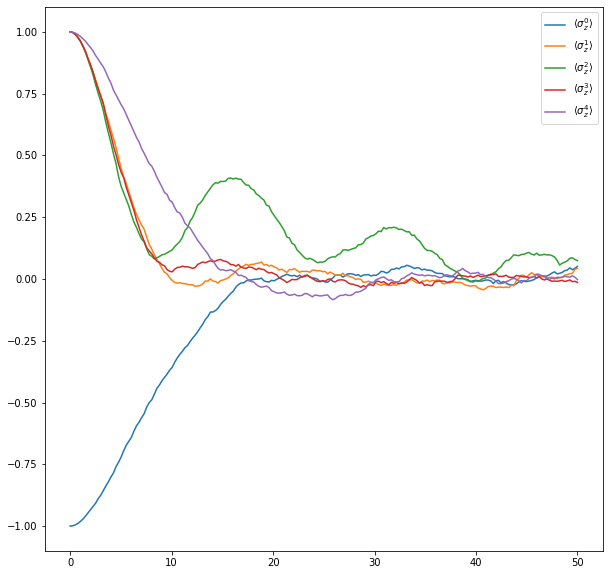

In [91]:
fig = plt.figure(figsize=(10, 10))

for n in range(N):
    plt.plot(tlist, sz_exp[n], label = r'$\langle\sigma_z^{%d}\rangle$'%n)    

plt.legend()
plt.show()